# Image Segmentation - Part 2: Edge Detection

In [1]:
%matplotlib notebook
import matplotlib
from plantcv import plantcv as pcv
from skimage import img_as_ubyte
from skimage.morphology import disk

In [2]:
matplotlib.rcParams["figure.max_open_warning"] = False
pcv.params.debug = "plot"
pcv.params.text_size = 30
pcv.params.text_thickness = 20
pcv.params.line_thickness = 10

## Edge detection

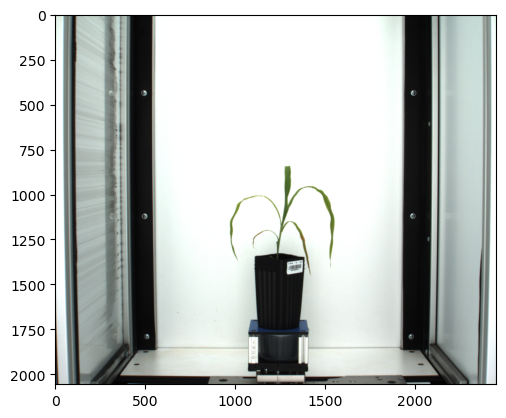

In [3]:
# Open image file
color_img, imgpath, imgname = pcv.readimage(filename="./images/VIS_SV_0_z1_h1_g0_e65_v500_190106_0.png")

### Excess Green Index

In Part 1 we created a grayscale image for thresholding by using colorspace properties (e.g. RGB, HSV, LAB). Here we will use the [Excess Green vegetation index](https://plantcv.readthedocs.io/en/stable/spectral_index/#egi), which combines RGB information into a single index.

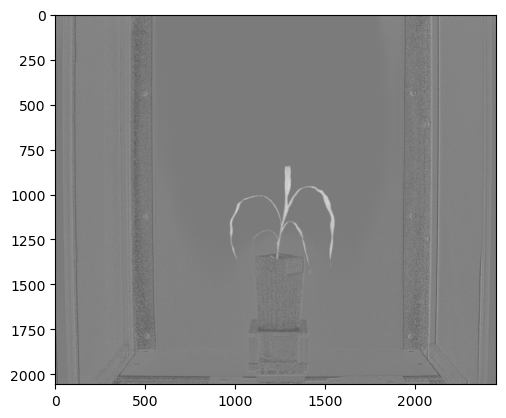

In [4]:
# Use RGB values to calculate the Excess Green Index
egi = pcv.spectral_index.egi(rgb_img=color_img)

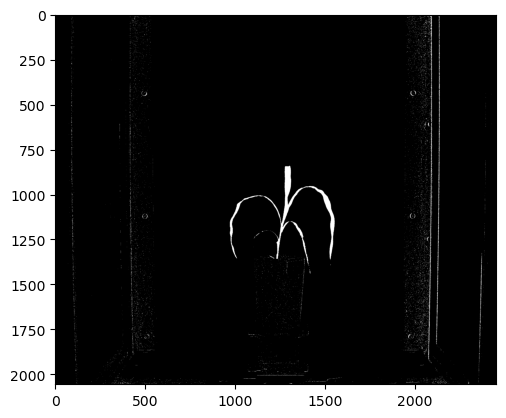

In [5]:
# Use the automatic Otsu threshold method to segment the EGI image
egi_thresh = pcv.threshold.otsu(gray_img=img_as_ubyte(egi.array_data), object_type="light")

### Thresholding the EGI image works well but misses some leaf area

Some leaves or parts of leaves are not segmented. In the image we can clearly see the delineation between plant and background, regardless of color, because there is sharp contrast between the darker plant and the bright background. Edge detection can be used to help us detect these transitions

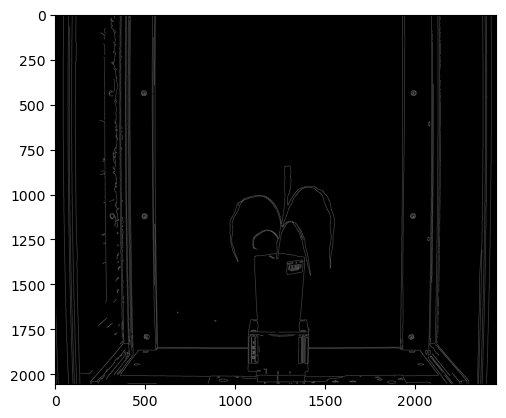

In [6]:
# Use edge detection to detect outlines in the image
edges = pcv.canny_edge_detect(img=color_img)

### Combine the thresholded image and edges to create boundaries around the segmented pixels

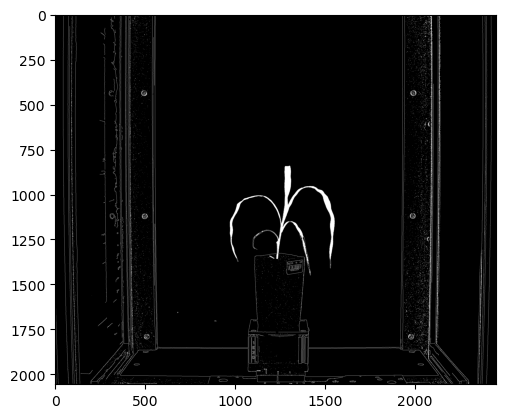

In [7]:
# Combine the edges and binary mask
mask = pcv.logical_or(bin_img1=egi_thresh, bin_img2=edges)

### Some leaves have gaps but are bound by the edges, closing these gaps fills in the missing parts

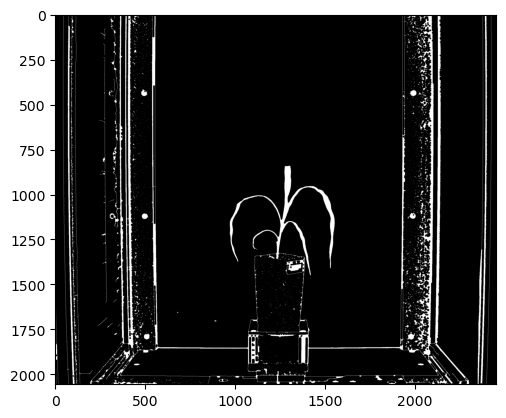

In [8]:
# Close holes in the leaves
filled_edges = pcv.closing(gray_img=mask, kernel=disk(4))